# Correlation Between Lifestyle Factors and Heart Disease

Spring 2025 Data Science Project
People: Eric, Krishnan, Shrinav

___

Contributions: 

___

## Introduction

For this project, our main topic is to understand the various factors that contribute to people getting Heart Disease. As many may know, certain factors, such as smoking and unhealthy lifestyle have some part in causing heart disease. However, we hope to understand to what degrees and also understand if there are other, unknown factors that impact heart health. 

As heart disease is one of the most significiant causes of death within the United States - and more importantly within the world in general - understanding to what degree current causes impact heart disease as well as possibly identifiying other factors can help people make better, more informed choices to maximize their chances of avoiding heart disease. 

___

## Data Curation

Our data comes from downloading the data from the [Kaggle Heart Disease Dataset](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease). However, the dataset indicates that the data was created using an aggregate of data from the CDC, with data coming from [2020](https://www.cdc.gov/brfss/annual_data/annual_2020.html) and [2022](https://www.cdc.gov/brfss/annual_data/annual_2022.html). The data was stored in two folders called "2020" and "2022" which each contained .csv files that contained the data for their respective years.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import f_oneway
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
df2020 = pd.read_csv("heart_2020_cleaned.csv")
df2022 = pd.read_csv("heart_2022_no_nans.csv")

In [4]:
print(df2020.columns)
print(df2022.columns)
print(df2020.columns.intersection(df2022.columns))

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLa

# Data transformation
as we can see from the above, which lists the columns in both 2020 and 2022, there is not a perfect match of column in both name and number. However, we will attempt to map some of the 2022 columns names into their matchin names in 2020 to attempt to obtain a dataset that is more comprehensive

In [4]:
df2022["KidneyDisease"] = df2022["HadKidneyDisease"]
df2022["SkinCancer"] = df2022["HadSkinCancer"]
df2022["Asthma"] = df2022["HadAsthma"]
df2022["PhysicalActivity"] = df2022["PhysicalActivities"]
df2022["Diabetes"] = df2022["HadDiabetes"]
df2022["SleepTime"] = df2022["SleepHours"]
df2022["GenHealth"] = df2022["GeneralHealth"]
df2022["Race"] = df2022["RaceEthnicityCategory"]
df2022["DiffWalking"] = df2022["DifficultyWalking"]
df2022["PhysicalHealth"] = df2022["PhysicalHealthDays"]
df2022["MentalHealth"] = df2022["MentalHealthDays"]
df2022["Stroke"] = df2022["HadStroke"]
df2022["AlcoholDrinking"] = df2022["AlcoholDrinkers"]
df2022["Smoking"] = df2022["SmokerStatus"]

# Eric
## What I looked for:
    Created histogram for 2020's AgeCategory, and saw if there was a correlation between BMI and if they had heart disease

## Part 1: Eric
### Null Hypothesis: There is no association between BMI and Heart Disease
### Alternative Hypothesis: There is an association between BMI and Heart Disease
### alpha = 0.05

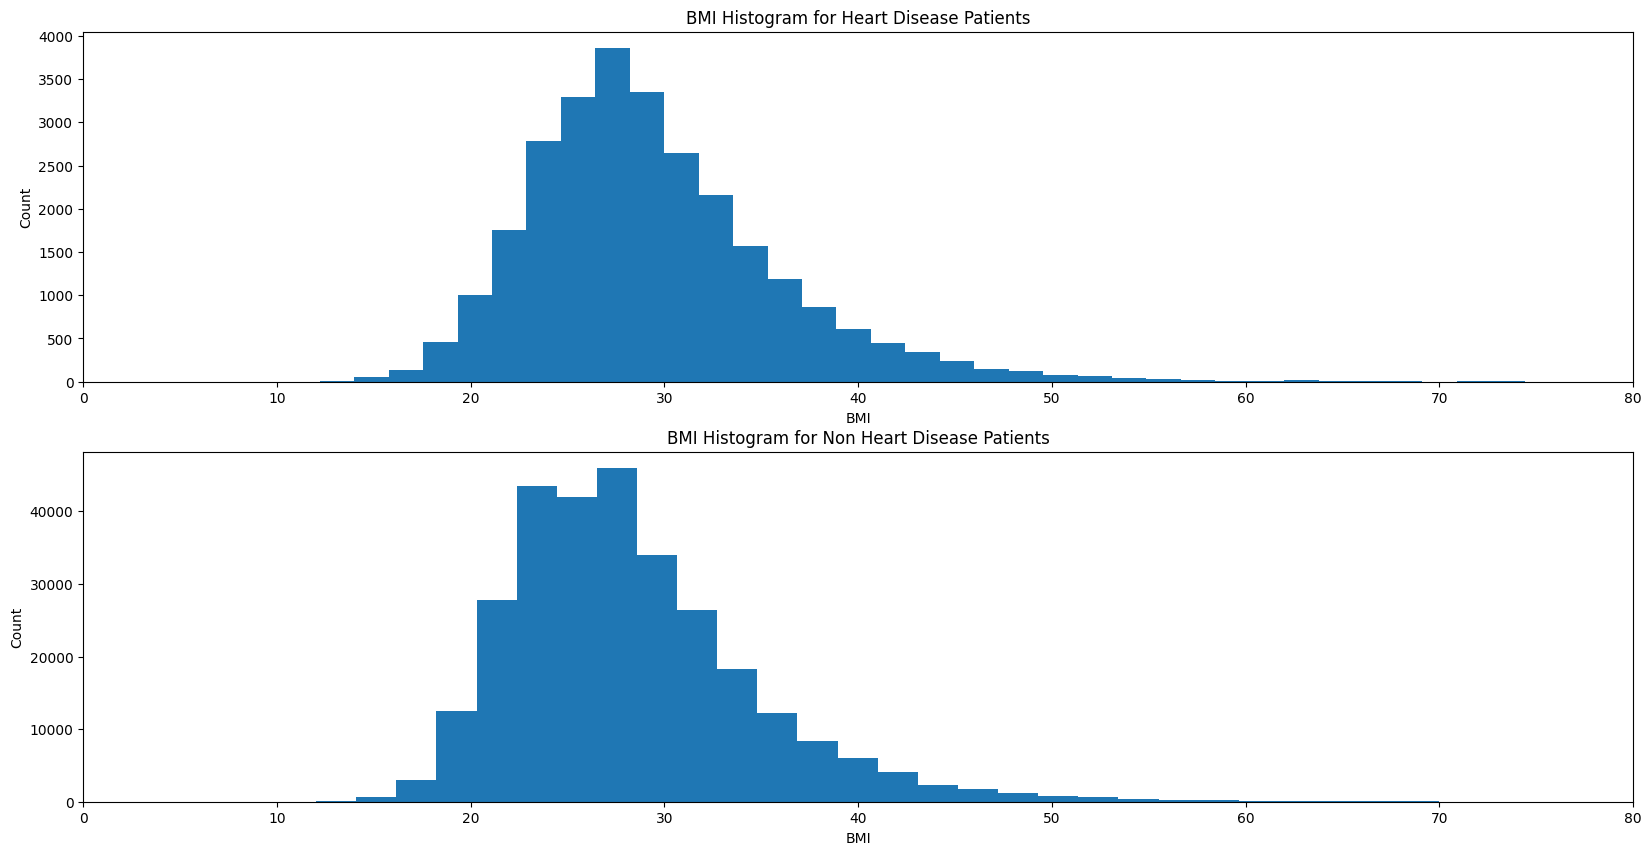

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

ax1.hist(df2020[df2020["HeartDisease"] == "Yes"]["BMI"], bins=40)
ax2.hist(df2020[df2020["HeartDisease"] == "No"]["BMI"], bins=40)

ax1.set_title('BMI Histogram for Heart Disease Patients')
ax2.set_title('BMI Histogram for Non Heart Disease Patients')

for ax in (ax1, ax2):
    ax.set_xlabel("BMI")
    ax.set_ylabel("Count")
    ax.set_xbound(lower=0, upper=80)

In [7]:
data_crosstab = pd.crosstab(pd.cut(df2020["BMI"], 40), df2020["HeartDisease"])
data_crosstab

HeartDisease,No,Yes
BMI,,
"(11.937, 14.091]",119,14
"(14.091, 16.162]",607,69
"(16.162, 18.232]",2984,237
"(18.232, 20.303]",12437,817
"(20.303, 22.374]",27722,1701
"(22.374, 24.444]",43499,3178
"(24.444, 26.515]",42045,3694
"(26.515, 28.586]",45920,4347
"(28.586, 30.657]",33924,3627


In [8]:
chi_contingency = scipy.stats.contingency.chi2_contingency(data_crosstab)
chi_contingency

Chi2ContingencyResult(statistic=np.float64(1126.2923927124457), pvalue=np.float64(1.4048700491399767e-211), dof=38, expected_freq=array([[1.21615804e+02, 1.13841961e+01],
       [6.18137469e+02, 5.78625307e+01],
       [2.94529702e+03, 2.75702975e+02],
       [1.21195178e+04, 1.13448222e+03],
       [2.69045248e+04, 2.51847521e+03],
       [4.26816607e+04, 3.99533927e+03],
       [4.18239493e+04, 3.91505073e+03],
       [4.59643730e+04, 4.30262697e+03],
       [3.43368049e+04, 3.21419510e+03],
       [2.67563913e+04, 2.50460874e+03],
       [1.85633266e+04, 1.73767343e+03],
       [1.25730624e+04, 1.17693757e+03],
       [8.58168661e+03, 8.03313388e+02],
       [6.11919518e+03, 5.72804816e+02],
       [4.18705839e+03, 3.91941609e+02],
       [2.44237453e+03, 2.28625473e+02],
       [1.80777778e+03, 1.69222224e+02],
       [1.25730624e+03, 1.17693757e+02],
       [7.89131118e+02, 7.38688816e+01],
       [6.15394256e+02, 5.76057443e+01],
       [3.48388130e+02, 3.26118701e+01],
       [2

## Conclusion

As we can see from the chi square test, comparing the distribution of BMI's of individuals without heart disease and BMI's of individuals with heart disease, we optain a p-value of 1.404e-211, which is less than our alpha of 0.05. As such we reject the null hypothesis, and conclude that there is an association between heart disease and bmi

## Part 2: Krishnan

### Null Hypothesis: There is no significant difference in the average sleep time between people with heart disease and those without heart disease
### Alternative Hypothesis: There is a significant difference in the average sleep time between people with heart disease and those without heart disease.
### alpha = 0.05

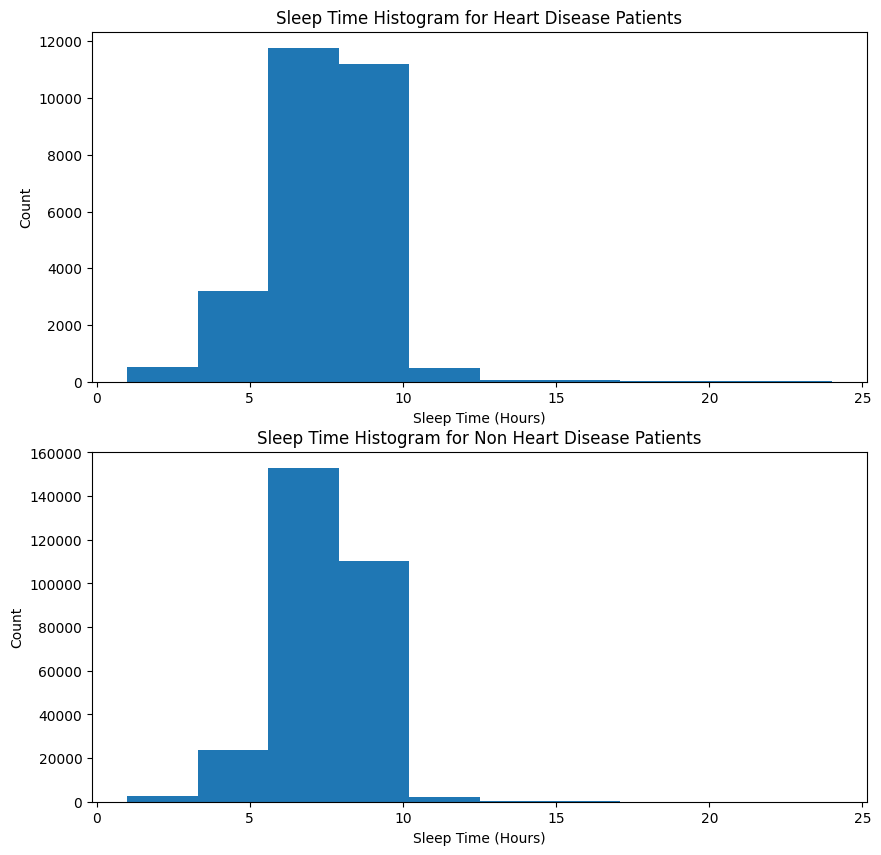

In [13]:
sleeptime_heart_disease = df2020[df2020["HeartDisease"] == "Yes"]["SleepTime"]
sleeptime_no_heart_disease = df2020[df2020["HeartDisease"] == "No"]["SleepTime"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.hist(sleeptime_heart_disease)
ax2.hist(sleeptime_no_heart_disease)

ax1.set_title('Sleep Time Histogram for Heart Disease Patients')
ax2.set_title('Sleep Time Histogram for Non Heart Disease Patients')

for ax in (ax1, ax2):
    ax.set_xlabel("Sleep Time (Hours)")
    ax.set_ylabel("Count")

## Explanation
I conducted a t-test to determine whether there was a significant difference in the average sleep time between those with heart disease and those without heart disease, or not. I used a t-test for this hypothesis since I am comparing the same mean values (sleep time) between two independent groups (heart disease and no heart disease). The data meets the normality condition required for the t-test because according to the **Central Limit Theorem**, distributions with greater than 30 samples are normal. The distributions of sleep times for people with and without heart disease have greater than 30 samples each.

In [10]:
t_test = scipy.stats.ttest_ind(sleeptime_heart_disease, sleeptime_no_heart_disease)
print(f"Test Statistic: {t_test.statistic}")
print(f"P-Value: {t_test.pvalue}")

Test Statistic: 4.7089022884677565
P-Value: 2.4915865758826605e-06


## Conclusion

Since I obtained a p-value of **2.4915865758826605e-06** from the t-test, which is less than our significance level of 0.05, I reject the null hypothesis. **Therefore, there is a significant difference in the average sleep time between those with heart disease and without heart disease**

## Part 3: Shrinav

### Null Hypothesis: There is no difference in average sleep time among different general health categories

### Alternative Hypothesis: At least one general health category has an average sleep time significantly different from the others

In [11]:
df = df2020
groups = df.groupby('GenHealth')['SleepTime'].apply(list)

anova = f_oneway(*groups)

print(anova.pvalue)

2.7127311027595126e-284


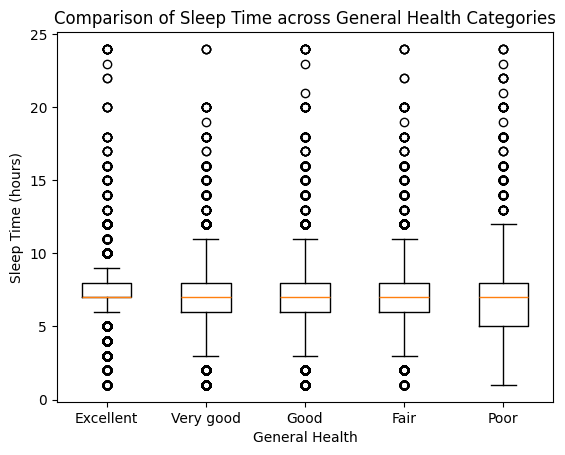

In [12]:
cats = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
data_to_plot = [df[df['GenHealth'] == category]['SleepTime'] for category in cats]

plt.boxplot(data_to_plot, tick_labels=cats)

plt.title('Comparison of Sleep Time across General Health Categories')
plt.xlabel('General Health')
plt.ylabel('Sleep Time (hours)')
plt.show()


## Conclusion

### Since our p-value is less than 0.05, we reject the null hypothesis, meaning there is a statistically significant difference in average sleep time among the different general health categories. This indicates that at least one general health group differs notably from the others in terms of sleep duration.

# Primary analysis

Based on the results of our exploration, we have decided to use the machine learning classification technique, decision trees. This is because most of the data that we have is categorical.

In [20]:
df2020

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [5]:
Y = pd.get_dummies(df2020["HeartDisease"], drop_first=True)
X = pd.get_dummies(df2020[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
           'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [22]:
models = {
    # "KNN1": KNeighborsClassifier(n_neighbors=1),
    # "KNN2": KNeighborsClassifier(n_neighbors=2),
    # "KNN3": KNeighborsClassifier(n_neighbors=3),
    # "KNN4": KNeighborsClassifier(n_neighbors=4),
    "DecisionTree": DecisionTreeClassifier(random_state=42, max_depth=5),
    # "LogisticRegression": LogisticRegression(max_iter=1000),
    # "XGBoost": XGBClassifier(max_depth=20, learning_rate=0.5, objective='binary:logistic')
}

In [34]:
for model_name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of {model_name}: {accuracy:.3f}")
    print(classification_report(y_test, y_pred))

Accuracy of DecisionTree: 0.913
              precision    recall  f1-score   support

       False       0.92      1.00      0.95     58367
        True       0.55      0.04      0.08      5592

    accuracy                           0.91     63959
   macro avg       0.73      0.52      0.52     63959
weighted avg       0.88      0.91      0.88     63959



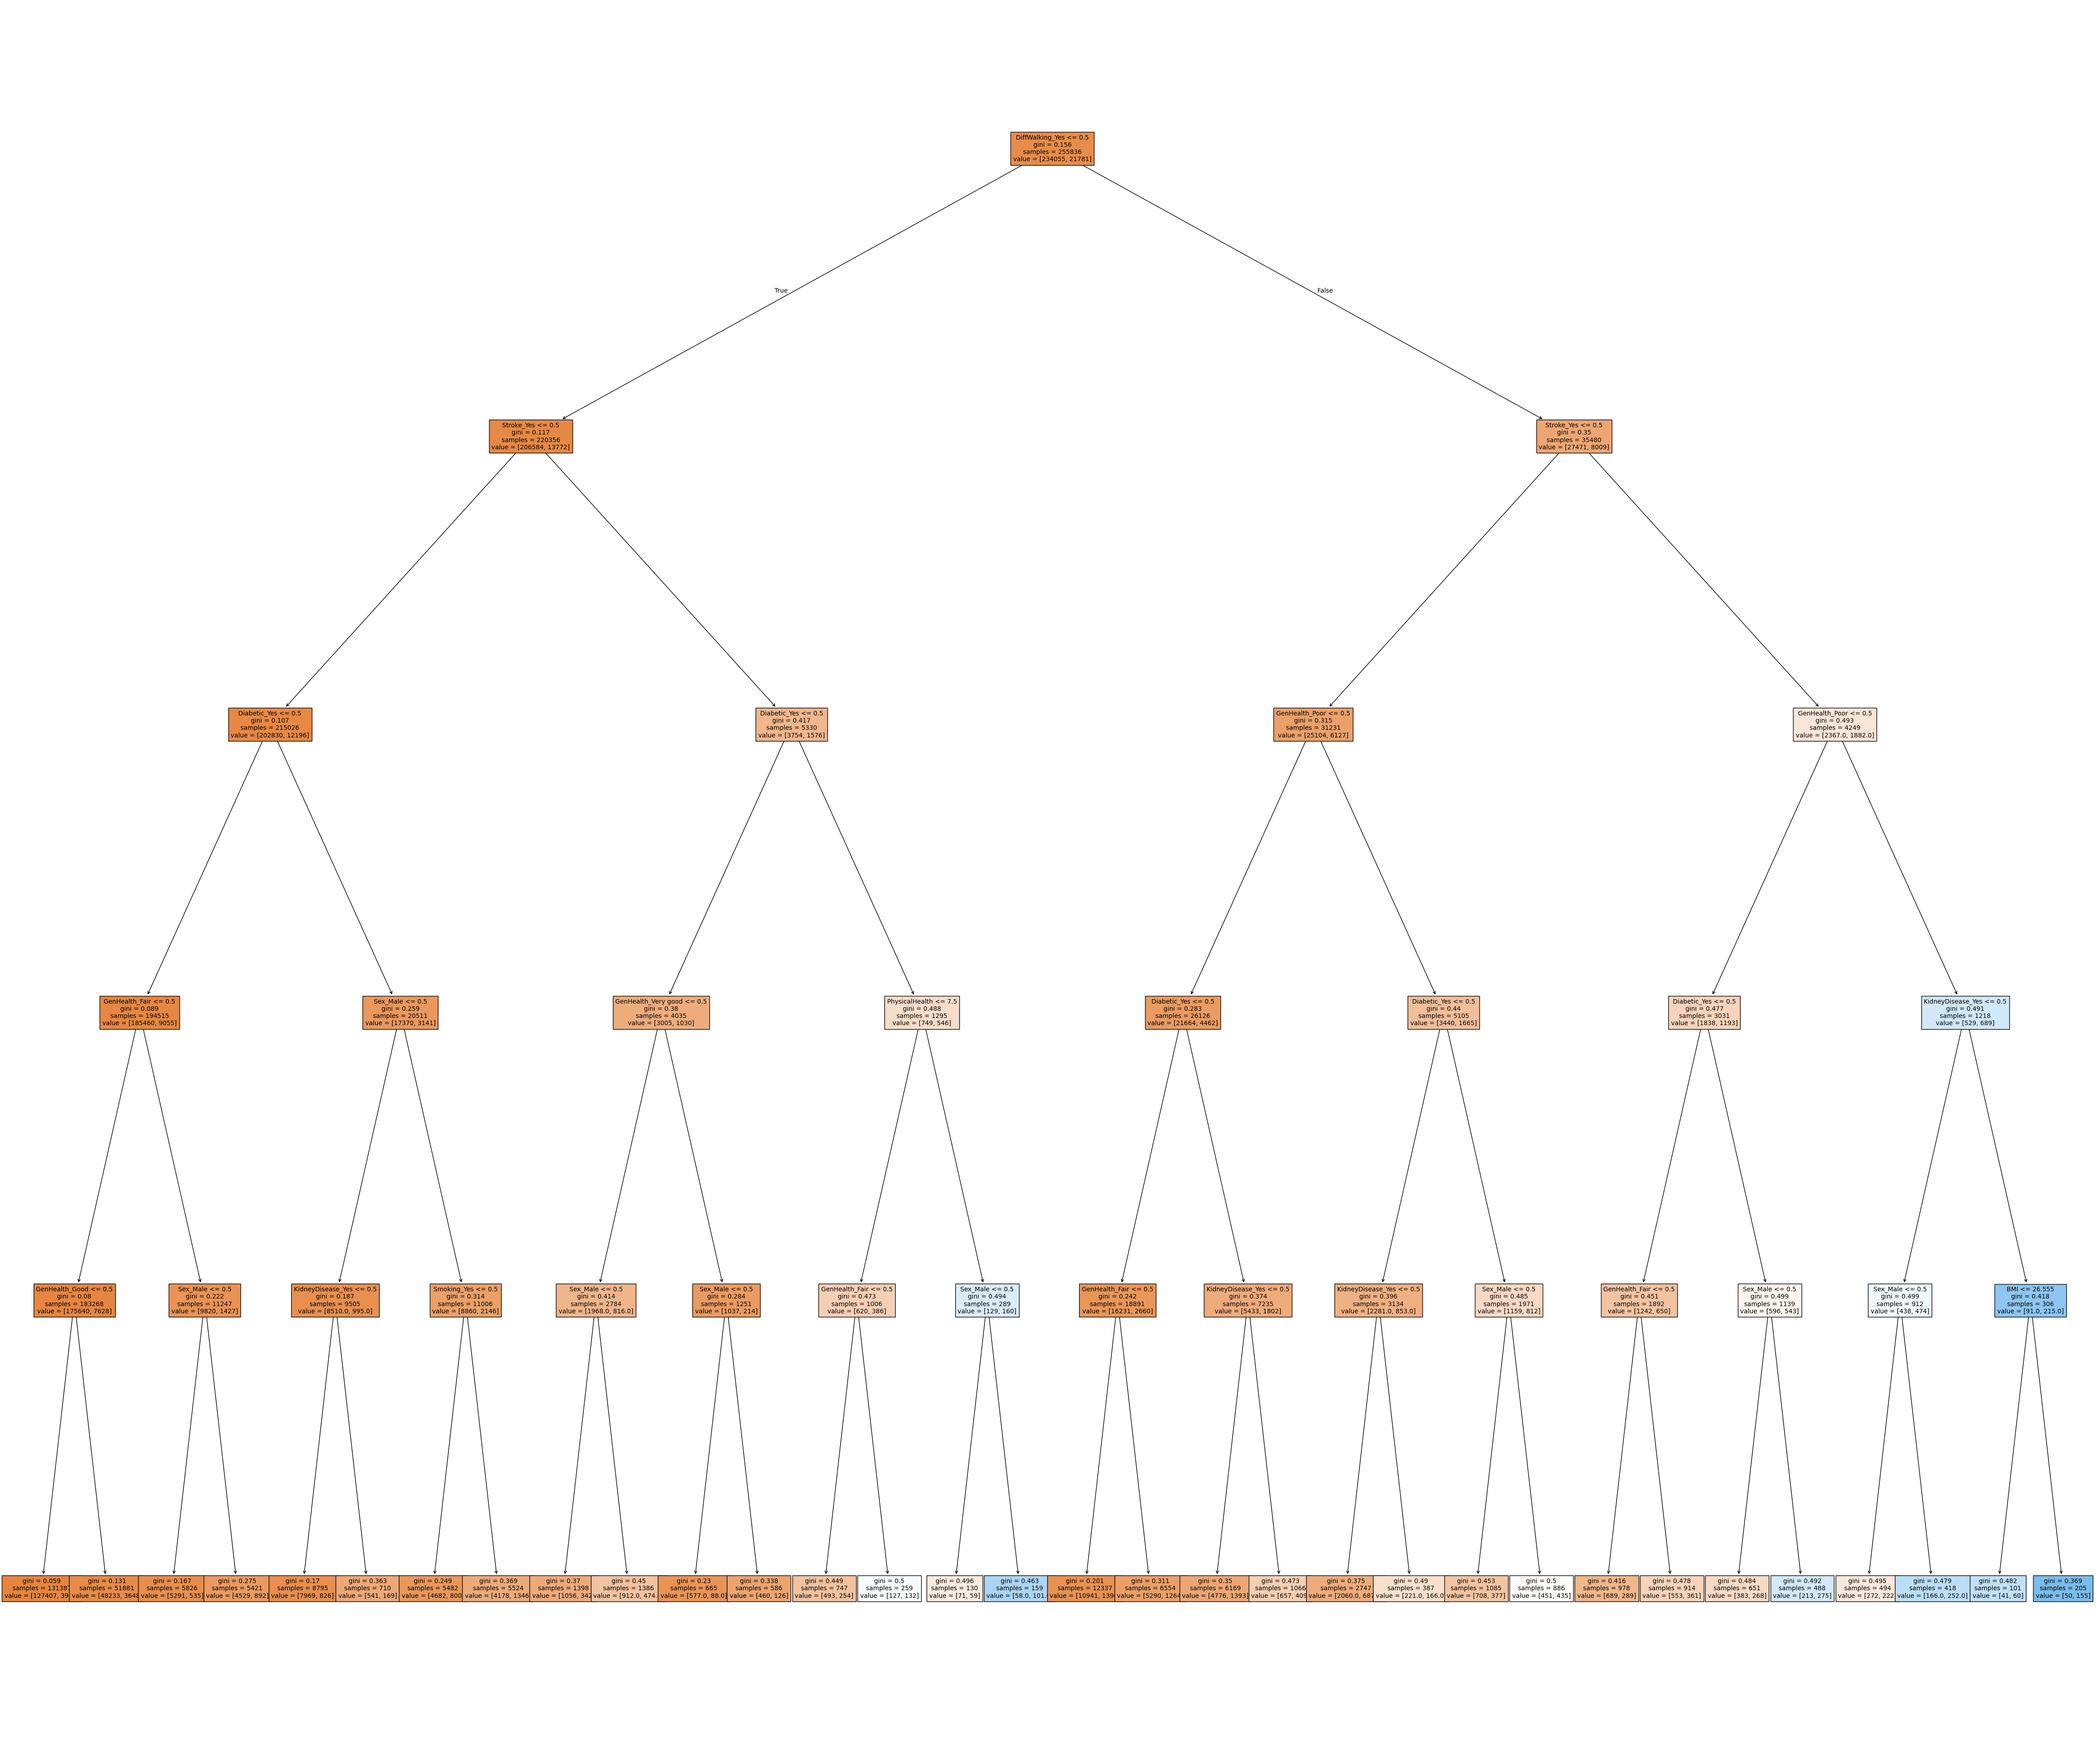

In [33]:
plt.figure(figsize=(60, 50))
plot_tree(model, feature_names=X.columns, class_names=None, filled=True, fontsize=10)
plt.show()

In [42]:
features = X.columns
feat_imp = [(feat, imp) for feat, imp in zip(features, model.feature_importances_)]
feat_imp.sort(key=lambda x: x[1], reverse=True)

for feat, imp in feat_imp:
    print(f"Importance of {feat}:{' ' * (20 - len(feat))} {imp}")

Importance of DiffWalking_Yes:      0.37544334039030497
Importance of Stroke_Yes:           0.24193686296934938
Importance of Diabetic_Yes:         0.15468800156940243
Importance of GenHealth_Poor:       0.05939160537498072
Importance of GenHealth_Fair:       0.052757608656044744
Importance of Sex_Male:             0.041186943364793
Importance of GenHealth_Good:       0.02747012541716513
Importance of KidneyDisease_Yes:    0.025272148494627313
Importance of Smoking_Yes:          0.012117478119799229
Importance of GenHealth_Very good:  0.0059274262637996535
Importance of PhysicalHealth:       0.002989306388051593
Importance of BMI:                  0.000819152991681767
Importance of MentalHealth:         0.0
Importance of SleepTime:            0.0
Importance of AlcoholDrinking_Yes:  0.0
Importance of Race_Asian:           0.0
Importance of Race_Black:           0.0
Importance of Race_Hispanic:        0.0
Importance of Race_Other:           0.0
Importance of Race_White:           0.0
Imp

# Analysis of Decision Tree

From feature importance of the decision tree, we can see that of the factors that can impact are difficulty walking, stroke, nad being diabetics, and poor to fair health. While some of these factors such as difficulty walking and a low to moderate general health score might seem obvious to some, we believe that this model also highlights some lesser known factors that are correlated to heart disease, such as the occurance of a stroke or being diabetic. 